# Housing prices prediction

This noteboook is based on a kaggle compitition:<br>
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Overview of the data

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print("Training dataset; Number of features: {}".format(len(df_train.columns)-2))
df_train.head()

Training dataset; Number of features: 79


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("Training dataset: columns with missing values and the number of them")
df_train.isnull().sum()[df_train.isnull().sum().sort_values() > 0].sort_values(ascending=False)

Training dataset: columns with missing values and the number of them


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [4]:
print("Training dataset: percentage of values missing")
df_train.isnull().sum()[df_train.isnull().sum().sort_values() > 0].sort_values(ascending=False) / len(df_train) * 100

Training dataset: percentage of values missing


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [5]:
print("Test dataset; Number of features: {}".format(len(df_test.columns)-1))
df_test.head()

Test dataset; Number of features: 79


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print("Test dataset: columns with missing values and the number of them")
df_test.isnull().sum()[df_test.isnull().sum().sort_values() > 0].sort_values(ascending=False)

Test dataset: columns with missing values and the number of them


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [7]:
print("Test dataset: percentage of values missing")
df_test.isnull().sum()[df_test.isnull().sum().sort_values() > 0].sort_values(ascending=False) / len(df_train) * 100

Test dataset: percentage of values missing


PoolQC          99.726027
MiscFeature     96.438356
Alley           92.602740
Fence           80.068493
FireplaceQu     50.000000
LotFrontage     15.547945
GarageCond       5.342466
GarageYrBlt      5.342466
GarageQual       5.342466
GarageFinish     5.342466
GarageType       5.205479
BsmtCond         3.082192
BsmtExposure     3.013699
BsmtQual         3.013699
BsmtFinType1     2.876712
BsmtFinType2     2.876712
MasVnrType       1.095890
MasVnrArea       1.027397
MSZoning         0.273973
BsmtFullBath     0.136986
BsmtHalfBath     0.136986
Functional       0.136986
Utilities        0.136986
GarageCars       0.068493
GarageArea       0.068493
TotalBsmtSF      0.068493
KitchenQual      0.068493
BsmtUnfSF        0.068493
BsmtFinSF2       0.068493
BsmtFinSF1       0.068493
Exterior2nd      0.068493
Exterior1st      0.068493
SaleType         0.068493
dtype: float64

Outlier removal

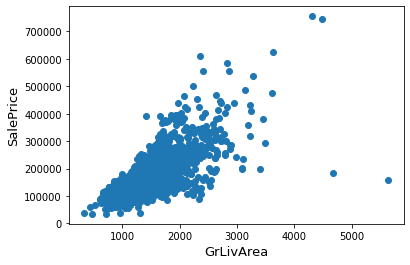

In [8]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

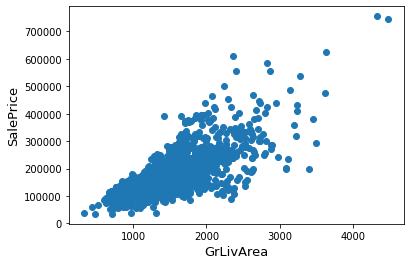

In [9]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [10]:
df_total = pd.concat([df_train, df_test], ignore_index=True, sort=False)

In [11]:
print("Combined dataset; Number of features: {}".format(len(df_total.columns)-2))
df_total.head()

Combined dataset; Number of features: 79


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Visualization of the training dataset

<Figure size 4320x1440 with 0 Axes>

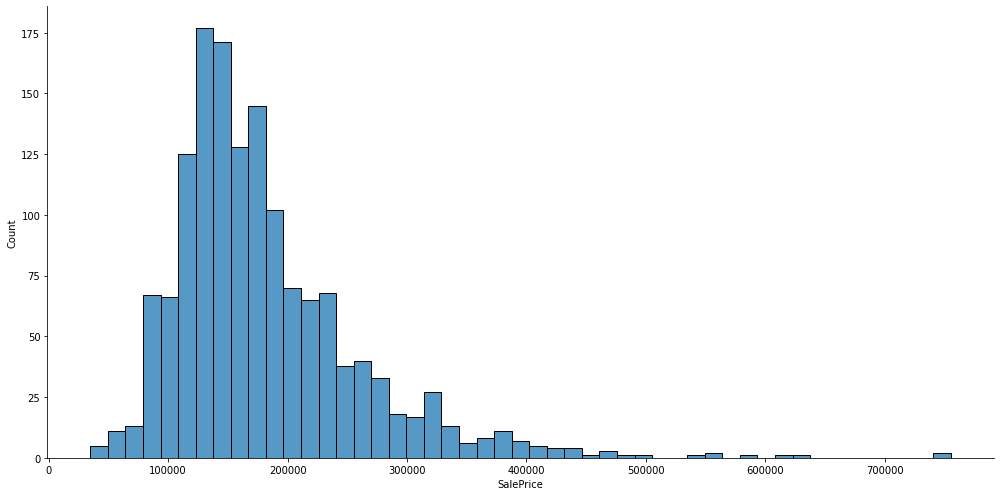

In [12]:
plt.figure(figsize=(60,20))
sns.displot(df_train['SalePrice'], height=7, aspect=2);

Check feature type

In [13]:
obj = []
num = []
for column in df_train.columns[1:-1]:
    if df_train[column].dtype == 'O':
        obj.append(column)
    elif df_train[column].dtype == 'int':
        df_train[column] = df_train[column].astype(float)
        num.append(column)
    elif df_train[column].dtype == 'float':
        num.append(column)
    else:
        raise TypeError("Column with unrecognized type of values exists.")

In [14]:
print("Number of categorical columns: {}".format(len(obj)))
print("Number of numerical columns: {}".format(len(num)))

Number of categorical columns: 43
Number of numerical columns: 36


Filling missing values for the training dataset

In [15]:
cat_none_train = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual"]
cat_miss_train = ["MasVnrType", "Electrical"]
num_none_train = ["LotFrontage", "GarageYrBlt"]
num_miss_train = ["MasVnrArea"]

In [16]:
for column in cat_none_train:
    df_train[column] = df_train[column].fillna('None')
for column in cat_miss_train:
    df_train[column] = df_train[column].fillna(df_total[column].value_counts().index[0])
for column in num_none_train:
    df_train[column] = df_train[column].fillna(0)
for column in num_miss_train:
    df_train[column] = df_train[column].fillna(df_total[column].mean())
df_train['SalePrice'] = df_train['SalePrice'].astype(float)
print("Traing dataset after filling in missing values")
df_train.head()

Traing dataset after filling in missing values


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


Filling missing values for the test dataset

In [17]:
cat_none_test = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual"]
cat_miss_test = ["MasVnrType", "Electrical", "MSZoning", "Utilities", "Functional", "Exterior1st", "Exterior2nd", "KitchenQual", "SaleType"]
num_none_test = ["LotFrontage", "GarageYrBlt", "BsmtFullBath", "BsmtHalfBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
num_miss_test = ["MasVnrArea", "GarageCars", "GarageArea"]

In [18]:
for column in cat_none_test:
    df_test[column] = df_test[column].fillna('None')
for column in cat_miss_test:
    df_test[column] = df_test[column].fillna(df_total[column].value_counts().index[0])
for column in num_none_test:
    df_test[column] = df_test[column].fillna(0)
for column in num_miss_test:
    df_test[column] = df_test[column].fillna(df_total[column].mean())
print("Test dataset after filling in missing values")
df_test.head()

Test dataset after filling in missing values


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal


In [19]:
print("Check if there are still missing values in the training and test dataset")
print("Training set: {}".format(df_train.isnull().values.any()))
print("Test set: {}".format(df_test.isnull().values.any()))

Check if there are still missing values in the training and test dataset
Training set: False
Test set: False


Fit the training dataset using part of it for validation

In [20]:
X = df_train.iloc[:, 1:-1]
y = df_train.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

ct = make_column_transformer(
    (StandardScaler(), num),
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), obj)
)

ct.fit(df_total.iloc[:, 1:-1])
X_train_normal = ct.transform(X_train)
X_val_normal = ct.transform(X_val)
X_test_normal = ct.transform(df_test.drop('Id', axis=1))
X_train_normal.shape, X_val_normal.shape, X_test_normal.shape

((1166, 79), (292, 79), (1459, 79))

In [22]:
# Custom root mean square error loss
def rmse(y_true, y_pred):
    return tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred)))

# Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train_normal.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=rmse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

history = model.fit(X_train_normal, y_train, epochs=500, validation_data=(X_val_normal, y_val), callbacks=[es])

Epoch 1/500
37/37 [==============================] - 1s 8ms/step - loss: 198644.5625 - mae: 182776.2812 - val_loss: 188783.3281 - val_mae: 173366.3906
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 198090.7031 - mae: 182273.4844 - val_loss: 187455.7031 - val_mae: 171945.4219
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 194019.2188 - mae: 178077.5000 - val_loss: 179133.5000 - val_mae: 163028.5000
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 177091.4531 - mae: 159658.1250 - val_loss: 149744.3594 - val_mae: 131031.8359
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 130103.2422 - mae: 107099.1719 - val_loss: 85687.9766 - val_mae: 58552.0156
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 72479.0703 - mae: 52322.9883 - val_loss: 65678.0781 - val_mae: 50691.4727
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 62545.8750 - mae: 45934.543

In [24]:
epochs_to_use = len(history.history['loss'])
print("Use {} epochs when training on all labeled data.".format(epochs_to_use))

Use 176 epochs when training on all labeled data.


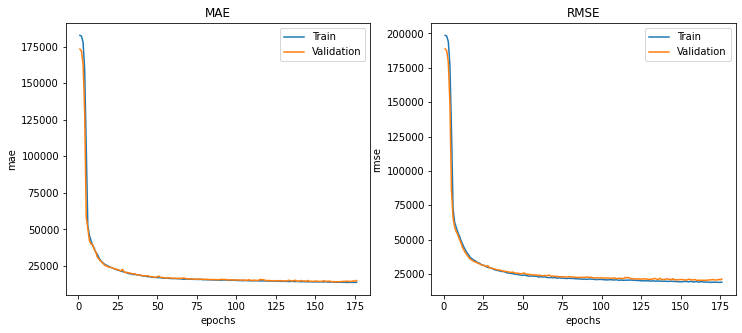

In [25]:
history_dict = history.history
train_mae = history.history['mae']
val_mae = history.history['val_mae']
train_rmse = history.history['loss']
val_rmse = history.history['val_loss']
epochs = range(1, len(train_mae)+1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(epochs, train_mae, label='Train')
ax1.plot(epochs, val_mae, label="Validation")
ax1.set_ylabel("mae")
ax1.set_xlabel("epochs")
ax1.legend(loc='best')
ax1.set_title("MAE")
ax2.plot(epochs, train_rmse, label='Train')
ax2.plot(epochs, val_rmse, label="Validation")
ax2.set_ylabel("rmse")
ax2.set_xlabel("epochs")
ax2.legend(loc='best')
ax2.set_title("RMSE")
plt.show();

In [26]:
print("mae (training): {}".format(history_dict['mae'][-1]))
print("mae / average housing prices (training): {}".format(history_dict['mae'][-1] / np.mean(y_train)))
print("mae (validation): {}".format(history_dict['val_mae'][-1]))
print("mae / average housing prices (validation): {}".format(history_dict['val_mae'][-1] / np.mean(y_val)))

mae (training): 13762.04296875
mae / average housing prices (training): 0.07528340057923989
mae (validation): 15006.1142578125
mae / average housing prices (validation): 0.08650812575133185


In [27]:
y_train_pred = model.predict(X_train_normal).squeeze()
y_val_pred = model.predict(X_val_normal).squeeze()

10/10 [==============================] - 0s 1ms/step


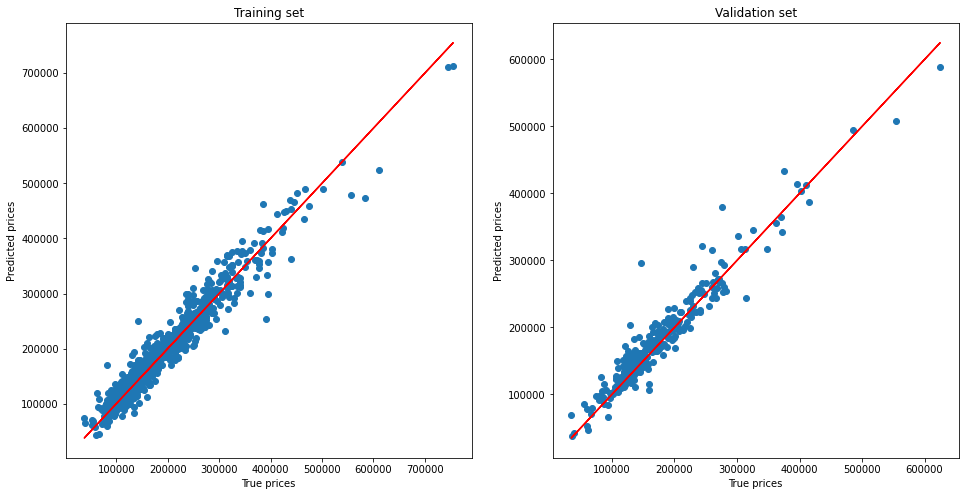

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.scatter(y_train, y_train_pred)
ax1.plot(y_train,y_train,'r')
ax1.set_xlabel('True prices')
ax1.set_ylabel('Predicted prices')
ax1.set_title("Training set")
ax2.scatter(y_val, y_val_pred)
ax2.plot(y_val,y_val,'r')
ax2.set_xlabel('True prices')
ax2.set_ylabel('Predicted prices')
ax2.set_title("Validation set")
plt.show()

Fit the entire training dataset

In [29]:
X_normal = ct.transform(X)
X_test_normal = ct.transform(df_test.drop('Id', axis=1))
X_normal.shape, X_test_normal.shape

((1458, 79), (1459, 79))

In [30]:
# The model based on the entire training set
epochs = epochs_to_use
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train_normal.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=rmse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

history = model.fit(X_normal, y, epochs=epochs)

Epoch 1/176
46/46 [==============================] - 1s 3ms/step - loss: 196765.8125 - mae: 180855.2031
Epoch 2/176
46/46 [==============================] - 0s 3ms/step - loss: 194492.5781 - mae: 178912.4219
Epoch 3/176
46/46 [==============================] - 0s 2ms/step - loss: 178435.6719 - mae: 161304.2344
Epoch 4/176
46/46 [==============================] - 0s 2ms/step - loss: 114049.3750 - mae: 91530.9609
Epoch 5/176
46/46 [==============================] - 0s 2ms/step - loss: 65895.1328 - mae: 48993.0586
Epoch 6/176
46/46 [==============================] - 0s 2ms/step - loss: 60120.1094 - mae: 42796.8945
Epoch 7/176
46/46 [==============================] - 0s 2ms/step - loss: 54467.6758 - mae: 38887.0273
Epoch 8/176
46/46 [==============================] - 0s 2ms/step - loss: 50174.1523 - mae: 35040.6055
Epoch 9/176
46/46 [==============================] - 0s 2ms/step - loss: 46371.3086 - mae: 31969.9375
Epoch 10/176
46/46 [==============================] - 0s 2ms/step - loss: 4

In [31]:
y_pred = model.predict(X_normal).squeeze()

46/46 [==============================] - 0s 1ms/step


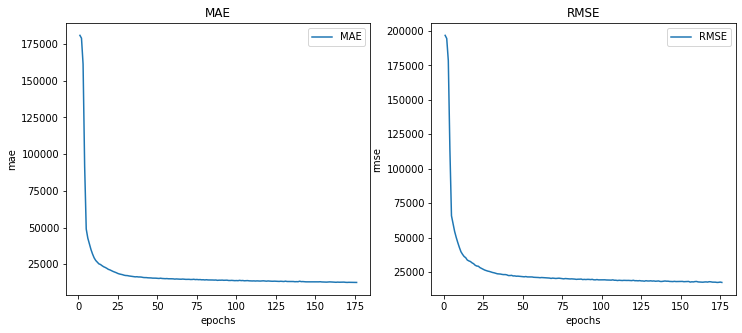

In [32]:
history_dict = history.history
mae = history.history['mae']
rmse = history.history['loss']
epochs = range(1, len(mae)+1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(epochs, mae, label='MAE')
ax1.set_ylabel("mae")
ax1.set_xlabel("epochs")
ax1.legend(loc='best')
ax1.set_title("MAE")
ax2.plot(epochs, rmse, label="RMSE")
ax2.set_ylabel("rmse")
ax2.set_xlabel("epochs")
ax2.legend(loc='best')
ax2.set_title("RMSE")
plt.show();

In [33]:
print("mae: {}".format(history_dict['mae'][-1]))
print("mae / average housing prices: {}".format(history_dict['mae'][-1] / np.mean(y)))

mae: 12644.4580078125
mae / average housing prices: 0.06988478422279347


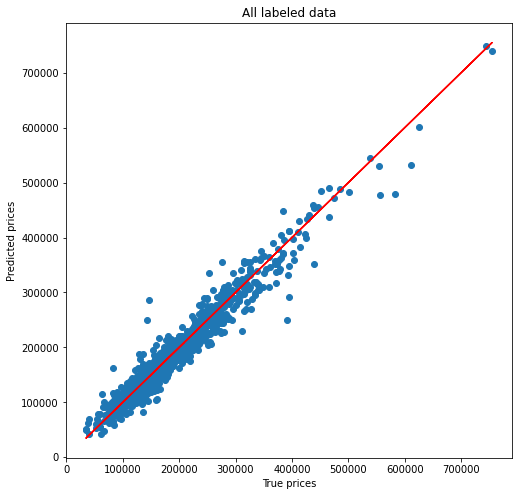

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(y, y_pred)
plt.plot(y,y,'r')
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title("All labeled data")
plt.show()

Error on all labeled data


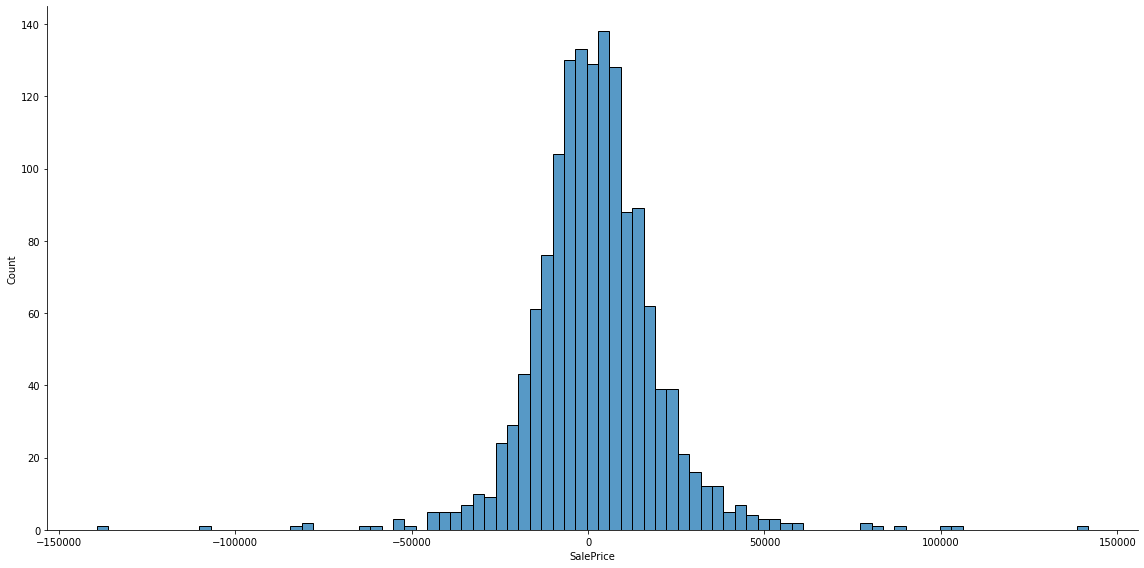

In [35]:
error = y - y_pred
print("Error on all labeled data")
sns.displot(error, height=8, aspect = 2)
plt.show()

Generate results and create output file for submission

In [36]:
result = model.predict(X_test_normal)

46/46 [==============================] - 0s 1ms/step


In [37]:
results = {}
results['Id'] = df_test["Id"]
results['SalePrice'] = result.squeeze()

In [38]:
df_sub = pd.DataFrame.from_dict(results)
df_sub

,Id,SalePrice
0,1461,122879.398438
1,1462,168476.421875
2,1463,183233.937500
3,1464,188745.656250
4,1465,180522.187500
...,...,...
1454,2915,99660.351562
1455,2916,84809.648438
1456,2917,164533.875000
1457,2918,112104.429688


In [39]:
df_sub.to_csv('submission.csv', index=False)  